# PM10 (미세먼지) 예측을 위한 모델링

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive') # collab에서 돌리기 떄문에 필요한 코드.

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/전체데이터.xlsx')

### Preprocessing

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.set_index('date', inplace=True)

### Data split

In [ ]:
X_data=df.drop(['PM10 (ug/m3)'], axis=1)

In [ ]:
target=df[['PM10 (ug/m3)']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, target)

### Modeling _ OLS

In [ ]:
multi_model = sm.OLS(y_train, X_train)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           PM10 (ug/m3)   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              836.5
Date:                Thu, 12 Aug 2021   Prob (F-statistic):                        0.00
Time:                        02:38:14   Log-Likelihood:                         -4625.6
No. Observations:                1118   AIC:                                      9281.
Df Residuals:                    1103   BIC:                                      9357.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PM2.5(bj)         0.0728      0.026      2.833      0.005       0.022       0.123
PM10(bj)         -0.0523      0.017     -3.141      0.002      -0.085      -0.020
PM2.5(gn)        -0.2358      0.030     -7.919      0.000      -0.294      -0.177
PM10(gn)          0.1702      0.015     11.058      0.000       0.140       0.200
PM2.5(tg)        -0.0723      0.035     -2.083      0.037      -0.140      -0.004
PM10(tg)          0.0481      0.028      1.736      0.083      -0.006       0.102
SO2 (ppm)       576.3315    401.796      1.434      0.152    -212.039    1364.702
O3 (ppm)        -74.0061     47.397     -1.561      0.119    -167.004      18.992
NO2 (ppm)        57.6068     56.189      1.025      0.305     -52.642     167.855
CO (ppm)          2.4874      3.865      0.644      0.520      -5.096      10.070
PM2.5 (ug/m3)     1.6350      0.048     34.329      0.000       1.542       1.728
평균기온(°C)         -0.4429      0.062     -7.175      0.000      -0.564      -0.322
일강수량(mm)         -0.0746      0.035     -2.106      0.035      -0.144      -0.005
평균 풍속(m/s)        4.0442      1.065      3.796      0.000       1.954       6.134
평균             3.628e-05   2.77e-05      1.311      0.190    -1.8e-05    9.06e-05
==============================================================================
Omnibus:                     1525.430   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           599417.322
Skew:                           7.165   Prob(JB):                         0.00
Kurtosis:                     115.527   Cond. No.                     8.60e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
multi_model2 = sm.OLS(y_test, X_test)
fitted_multi_model2 = multi_model2.fit()

In [ ]:
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           PM10 (ug/m3)   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              397.9
Date:                Thu, 12 Aug 2021   Prob (F-statistic):                   1.01e-212
Time:                        02:38:54   Log-Likelihood:                         -1465.7
No. Observations:                 373   AIC:                                      2961.
Df Residuals:                     358   BIC:                                      3020.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PM2.5(bj)        -0.0337      0.043     -0.788      0.431      -0.118       0.050
PM10(bj)          0.1040      0.037      2.823      0.005       0.032       0.176
PM2.5(gn)        -0.1371      0.057     -2.406      0.017      -0.249      -0.025
PM10(gn)          0.0310      0.035      0.876      0.382      -0.039       0.101
PM2.5(tg)        -0.0713      0.054     -1.329      0.185      -0.177       0.034
PM10(tg)          0.0637      0.044      1.464      0.144      -0.022       0.149
SO2 (ppm)       685.8918    567.320      1.209      0.227    -429.808    1801.591
O3 (ppm)         75.0843     66.954      1.121      0.263     -56.587     206.756
NO2 (ppm)       162.0557     75.727      2.140      0.033      13.129     310.982
CO (ppm)          2.7839      5.327      0.523      0.602      -7.691      13.259
PM2.5 (ug/m3)     1.3149      0.078     16.890      0.000       1.162       1.468
평균기온(°C)         -0.6666      0.088     -7.566      0.000      -0.840      -0.493
일강수량(mm)         -0.1644      0.077     -2.124      0.034      -0.317      -0.012
평균 풍속(m/s)        1.5432      1.427      1.081      0.280      -1.264       4.350
평균                0.0001   3.88e-05      3.435      0.001     5.7e-05       0.000
==============================================================================
Omnibus:                      208.473   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2492.994
Skew:                           2.089   Prob(JB):                         0.00
Kurtosis:                      14.956   Cond. No.                     8.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
fitted_multi_model.params

PM2.5(bj)          0.072777
PM10(bj)          -0.052292
PM2.5(gn)         -0.235833
PM10(gn)           0.170202
PM2.5(tg)         -0.072259
PM10(tg)           0.048083
SO2 (ppm)        576.331521
O3 (ppm)         -74.006120
NO2 (ppm)         57.606762
CO (ppm)           2.487441
PM2.5 (ug/m3)      1.635037
평균기온(°C)          -0.442917
일강수량(mm)          -0.074592
평균 풍속(m/s)         4.044189
평균                 0.000036
dtype: float64

In [ ]:
fitted_multi_model2.params

PM2.5(bj)         -0.033683
PM10(bj)           0.103963
PM2.5(gn)         -0.137087
PM10(gn)           0.031050
PM2.5(tg)         -0.071289
PM10(tg)           0.063737
SO2 (ppm)        685.891766
O3 (ppm)          75.084338
NO2 (ppm)        162.055726
CO (ppm)           2.783938
PM2.5 (ug/m3)      1.314910
평균기온(°C)          -0.666620
일강수량(mm)          -0.164425
평균 풍속(m/s)         1.543186
평균                 0.000133
dtype: float64

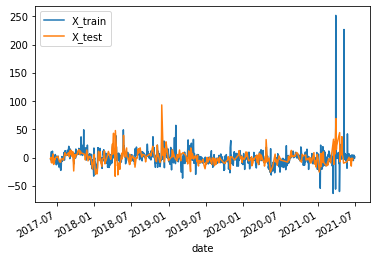

In [ ]:
import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label = "X_train")
fitted_multi_model2.resid.plot(label = "X_test")
plt.legend()

### 상관관계 

In [ ]:
X_test.corr()

,PM2.5(bj),PM10(bj),PM2.5(gn),PM10(gn),PM2.5(tg),PM10(tg),SO2 (ppm),O3 (ppm),NO2 (ppm),CO (ppm),PM2.5 (ug/m3),평균기온(°C),일강수량(mm),평균 풍속(m/s),평균
PM2.5(bj),1.000000,0.723437,0.402905,0.316608,0.743207,0.535915,0.123266,-0.171484,0.271704,0.239191,0.293008,-0.068424,-0.039930,-0.352772,0.084846
PM10(bj),0.723437,1.000000,0.314554,0.445866,0.534100,0.739288,0.129209,0.025613,0.245808,0.238787,0.267658,-0.101837,-0.074406,-0.201696,0.088137
PM2.5(gn),0.402905,0.314554,1.000000,0.863770,0.580648,0.434196,0.317372,-0.386245,0.439638,0.513008,0.531600,-0.461672,-0.134274,-0.363301,-0.043088
PM10(gn),0.316608,0.445866,0.863770,1.000000,0.442168,0.540619,0.278962,-0.253838,0.390115,0.459635,0.461821,-0.460140,-0.154378,-0.219803,0.030175
PM2.5(tg),0.743207,0.534100,0.580648,0.442168,1.000000,0.768863,0.249551,-0.271554,0.348178,0.316498,0.390782,-0.246665,-0.101652,-0.388788,0.043178
PM10(tg),0.535915,0.739288,0.434196,0.540619,0.768863,1.000000,0.257541,-0.094580,0.312000,0.289802,0.356622,-0.254685,-0.137652,-0.237021,0.085185
SO2 (ppm),0.123266,0.129209,0.317372,0.278962,0.249551,0.257541,1.000000,-0.211942,0.385185,0.463044,0.424981,-0.429909,-0.193959,-0.194953,0.040783
O3 (ppm),-0.171484,0.025613,-0.386245,-0.253838,-0.271554,-0.094580,-0.211942,1.000000,-0.338181,-0.224465,-0.087710,0.369664,-0.061506,0.450509,-0.066697
NO2 (ppm),0.271704,0.245808,0.439638,0.390115,0.348178,0.312000,0.385185,-0.338181,1.000000,0.645176,0.599044,-0.351376,-0.133653,-0.450502,0.279310
CO (ppm),0.239191,0.238787,0.513008,0.459635,0.316498,0.289802,0.463044,-0.224465,0.645176,1.000000,0.652599,-0.432816,-0.116441,-0.367610,0.175481


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_

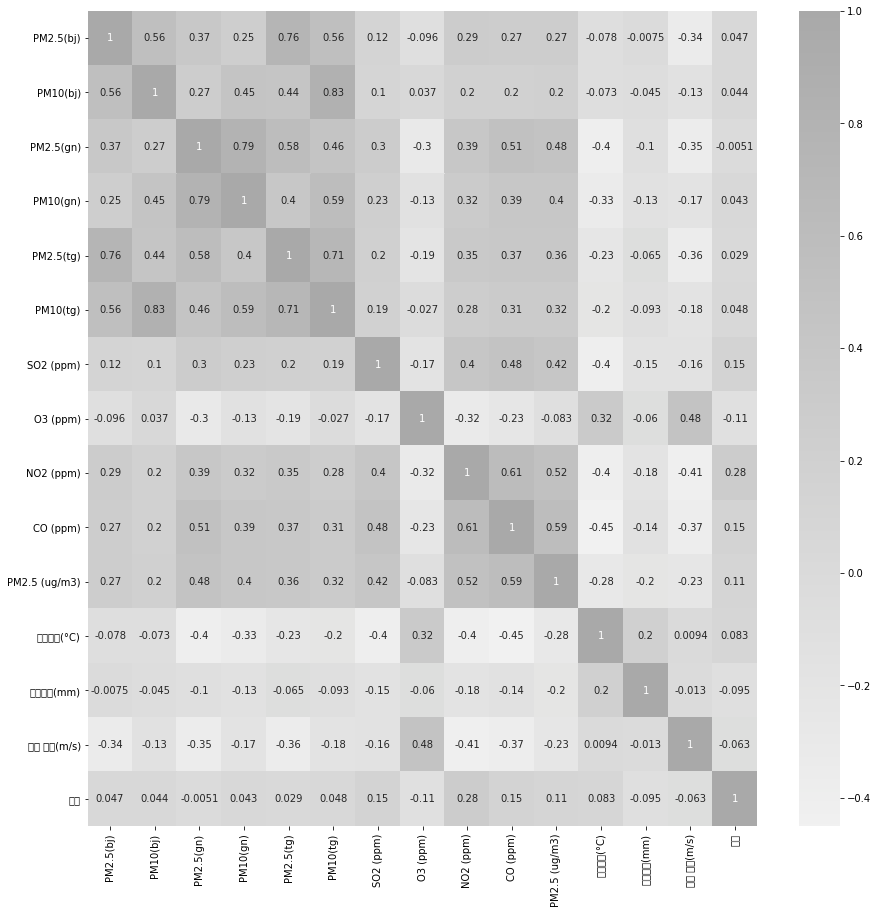

In [ ]:
import seaborn as sns  
plt.figure(figsize=(15, 15))                      #heatmap 만들기 위한 라이브러리
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(X_train.corr(), annot = True, cmap = cmap)
plt.show()

In [ ]:
multi_model_all = sm.OLS(target, X_data)
fitted_multi_model_all = multi_model_all.fit()
fitted_multi_model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           PM10 (ug/m3)   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                              1163.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):                        0.00
Time:                        02:43:43   Log-Likelihood:                         -6131.5
No. Observations:                1491   AIC:                                  1.229e+04
Df Residuals:                    1476   BIC:                                  1.237e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PM2.5(bj)         0.0660      0.022      3.034      0.002       0.023       0.109
PM10(bj)         -0.0442      0.015     -2.993      0.003      -0.073      -0.015
PM2.5(gn)        -0.2404      0.026     -9.175      0.000      -0.292      -0.189
PM10(gn)          0.1575      0.014     11.229      0.000       0.130       0.185
PM2.5(tg)        -0.0748      0.029     -2.537      0.011      -0.133      -0.017
PM10(tg)          0.0598      0.024      2.540      0.011       0.014       0.106
SO2 (ppm)       630.2494    337.025      1.870      0.062     -30.850    1291.349
O3 (ppm)        -21.1270     39.497     -0.535      0.593     -98.604      56.350
NO2 (ppm)        79.2618     46.303      1.712      0.087     -11.565     170.089
CO (ppm)          2.2444      3.222      0.697      0.486      -4.075       8.564
PM2.5 (ug/m3)     1.5697      0.041     38.004      0.000       1.489       1.651
평균기온(°C)         -0.4947      0.052     -9.550      0.000      -0.596      -0.393
일강수량(mm)         -0.0846      0.032     -2.630      0.009      -0.148      -0.022
평균 풍속(m/s)        3.0987      0.878      3.528      0.000       1.376       4.821
평균              5.96e-05    2.3e-05      2.590      0.010    1.45e-05       0.000
==============================================================================
Omnibus:                     1952.977   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           708891.040
Skew:                           6.767   Prob(JB):                         0.00
Kurtosis:                     108.960   Cond. No.                     8.53e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

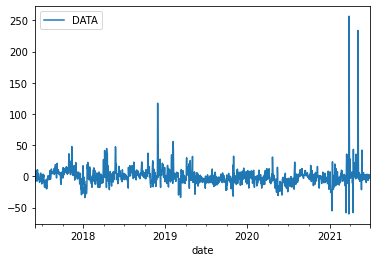

In [ ]:

fitted_multi_model_all.resid.plot(label = "DATA")

plt.legend()

In [ ]:
X_data.corr()

,PM2.5(bj),PM10(bj),PM2.5(gn),PM10(gn),PM2.5(tg),PM10(tg),SO2 (ppm),O3 (ppm),NO2 (ppm),CO (ppm),PM2.5 (ug/m3),평균기온(°C),일강수량(mm),평균 풍속(m/s),평균
PM2.5(bj),1.000000,0.583688,0.377405,0.265660,0.755717,0.547780,0.123571,-0.116410,0.286484,0.260550,0.274545,-0.075607,-0.013517,-0.339579,0.058138
PM10(bj),0.583688,1.000000,0.272818,0.449033,0.452191,0.809418,0.106173,0.034352,0.204935,0.203787,0.211847,-0.077551,-0.048343,-0.137473,0.052171
PM2.5(gn),0.377405,0.272818,1.000000,0.801392,0.582497,0.453283,0.305565,-0.321765,0.404070,0.508577,0.489464,-0.415516,-0.105942,-0.352587,-0.015329
PM10(gn),0.265660,0.449033,0.801392,1.000000,0.402822,0.582477,0.239221,-0.154747,0.329128,0.405762,0.408290,-0.355871,-0.132472,-0.183717,0.039925
PM2.5(tg),0.755717,0.452191,0.582497,0.402822,1.000000,0.718592,0.216097,-0.213828,0.349773,0.353903,0.370412,-0.231535,-0.071187,-0.369004,0.031997
PM10(tg),0.547780,0.809418,0.453283,0.582477,0.718592,1.000000,0.202536,-0.042189,0.282987,0.302651,0.324735,-0.213591,-0.099957,-0.191754,0.056236
SO2 (ppm),0.123571,0.106173,0.305565,0.239221,0.216097,0.202536,1.000000,-0.183850,0.396630,0.476572,0.417518,-0.406778,-0.155520,-0.165274,0.119151
O3 (ppm),-0.116410,0.034352,-0.321765,-0.154747,-0.213828,-0.042189,-0.183850,1.000000,-0.321169,-0.227692,-0.084515,0.335370,-0.060807,0.473399,-0.097991
NO2 (ppm),0.286484,0.204935,0.404070,0.329128,0.349773,0.282987,0.396630,-0.321169,1.000000,0.622288,0.535966,-0.385287,-0.166480,-0.414321,0.281046
CO (ppm),0.260550,0.203787,0.508577,0.405762,0.353903,0.302651,0.476572,-0.227692,0.622288,1.000000,0.605214,-0.445607,-0.131563,-0.365182,0.155272


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_

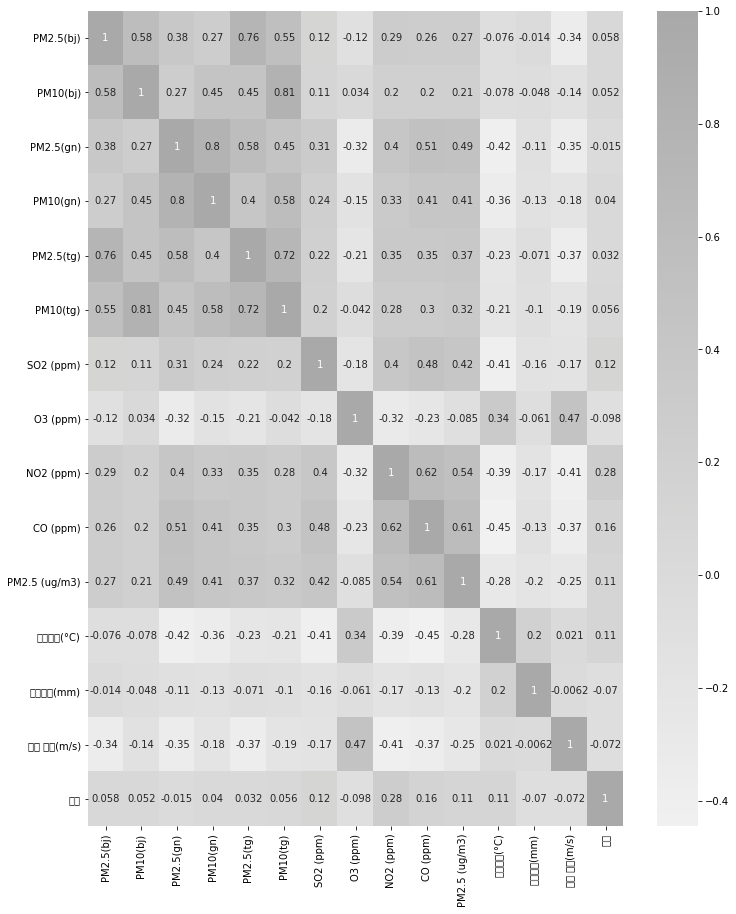

In [ ]:
plt.figure(figsize=(12, 15))          
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(X_data.corr(), annot = True, cmap = cmap)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_

<Figure size 360x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0,

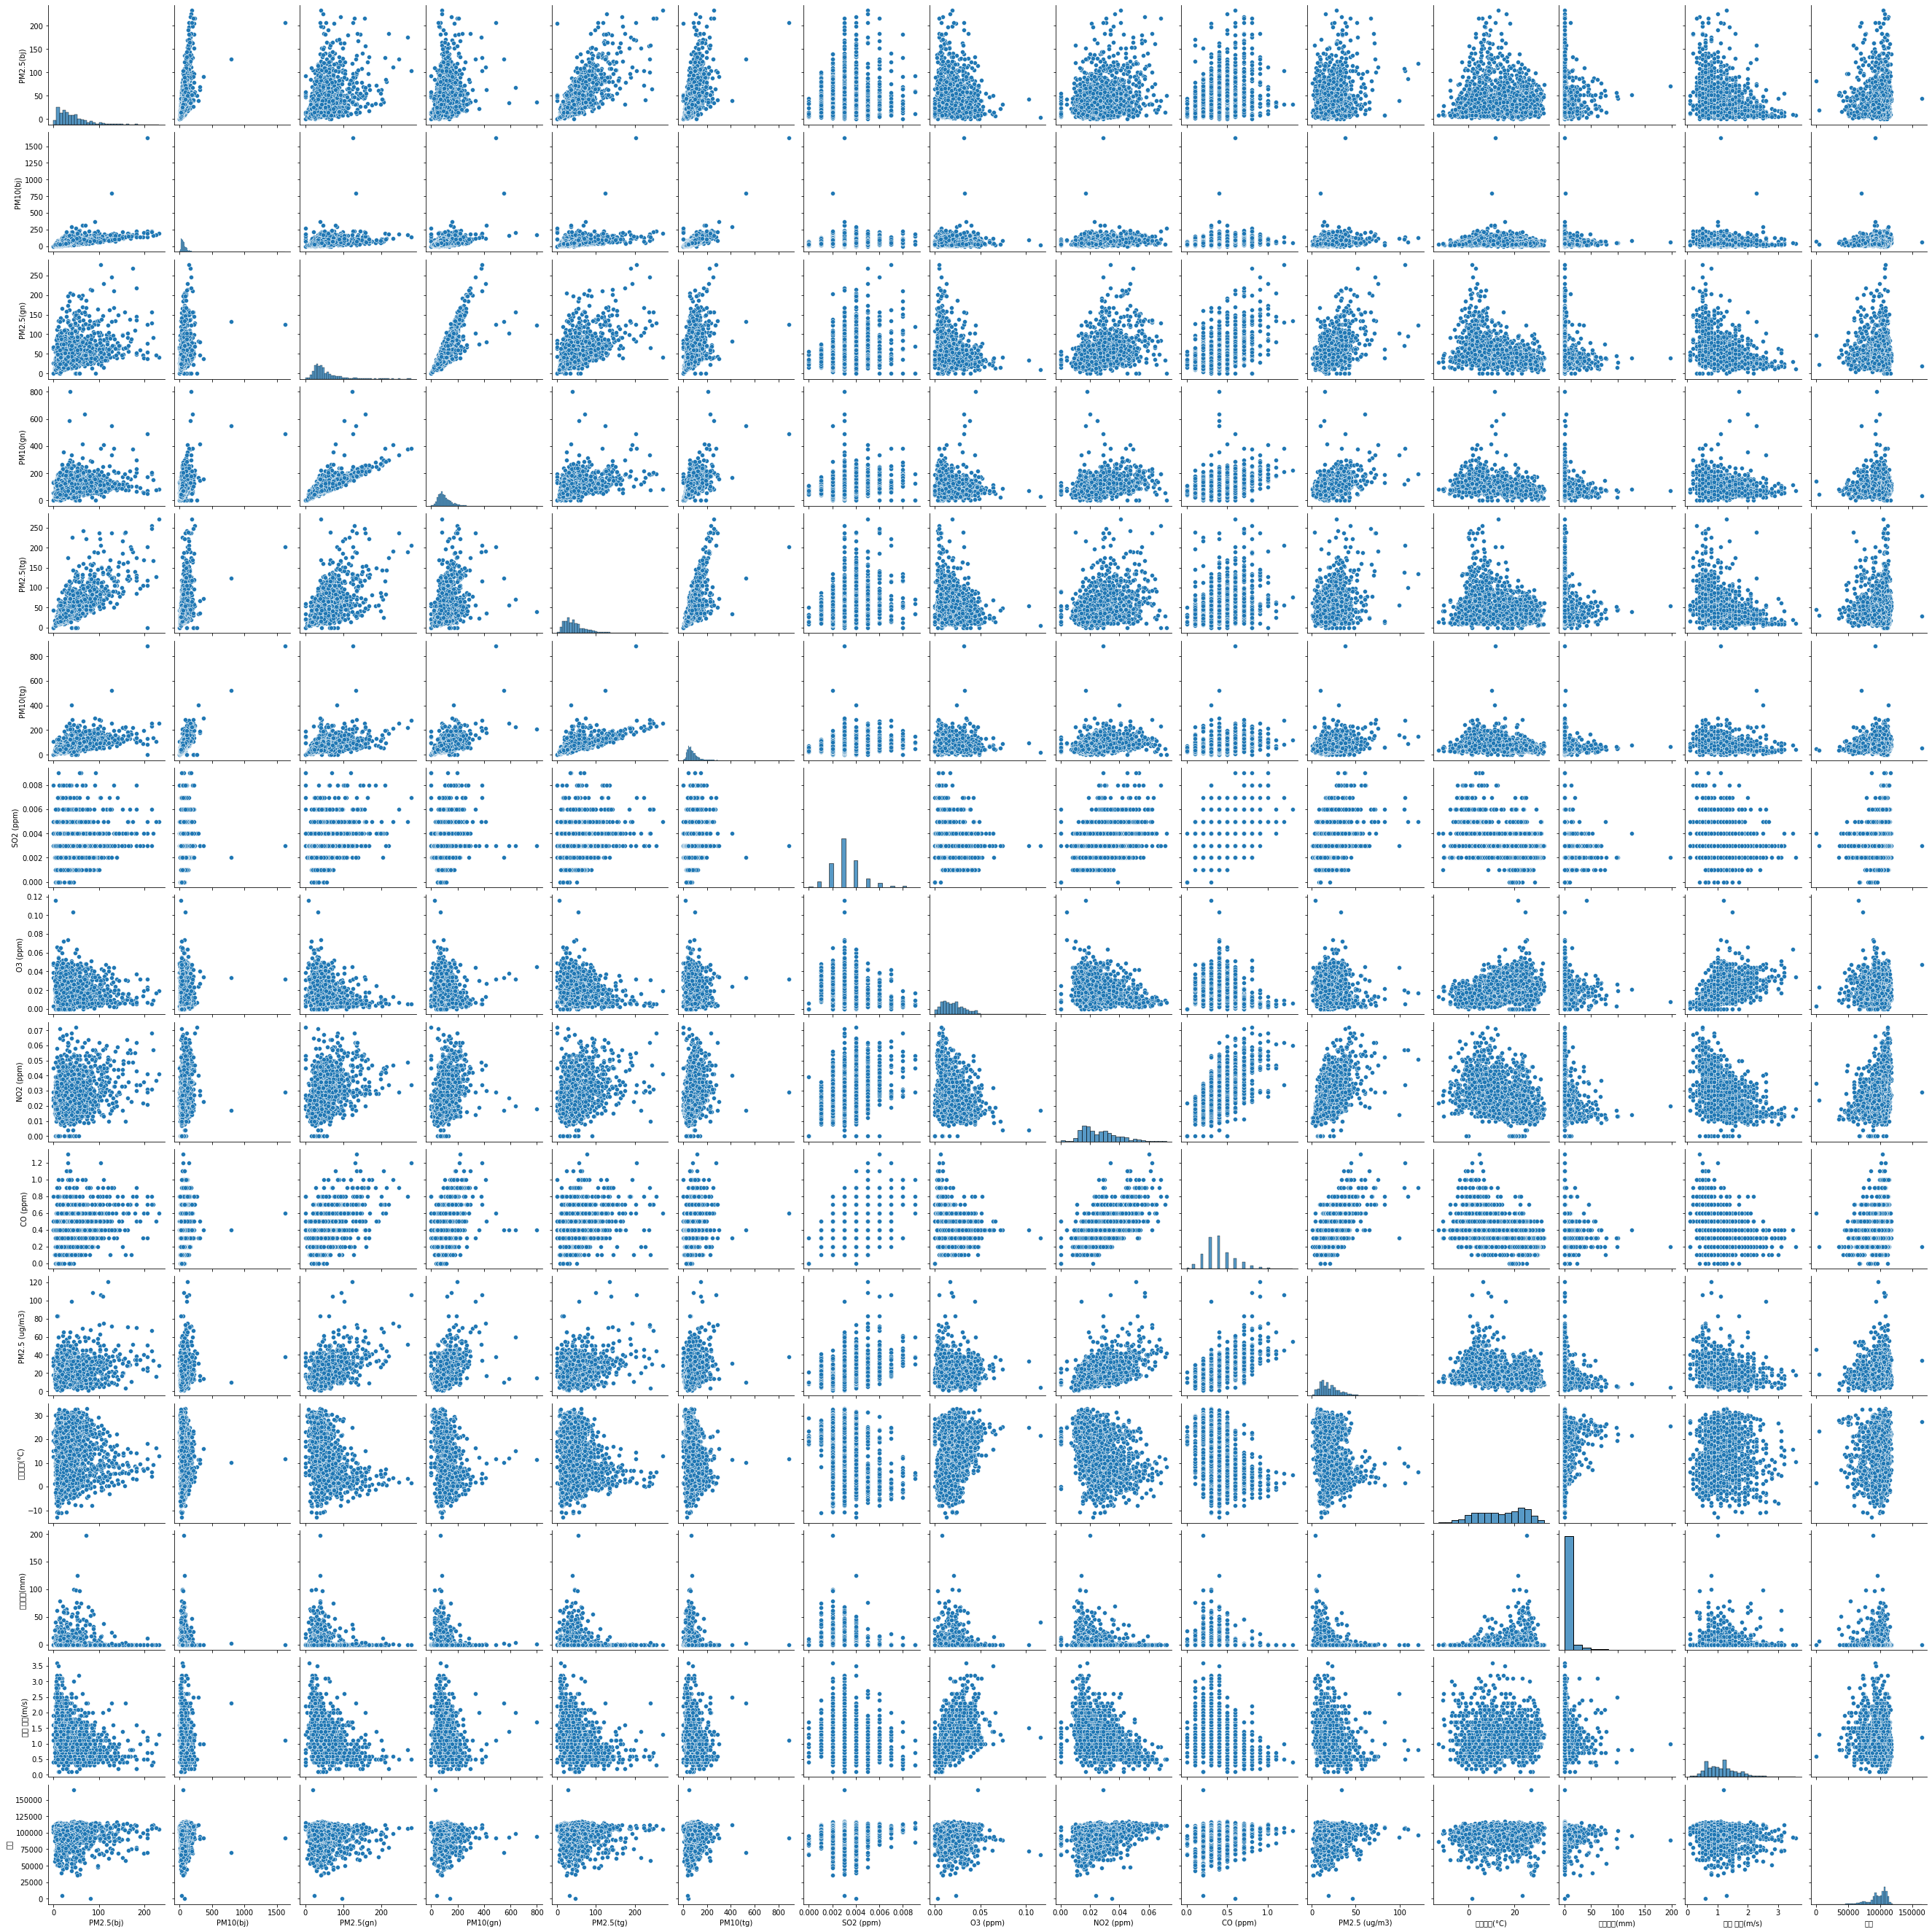

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(X_data)
plt.show()

---

In [ ]:
X_data = df.drop(['PM10 (ug/m3)'], axis=1)

In [ ]:
y_data = df[['PM10 (ug/m3)']]

### Scaling _ MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
X_data_m=scaler.fit_transform(X_data)
y_data_m = scaler.fit_transform(y_data)

In [ ]:
y_data_m.shape, X_data.shape

((1491, 1), (1491, 15))

# LSTM

In [ ]:
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(LSTM(15, activation='tanh', return_sequences=False, input_shape=(15, 1)))
model.add(Dense(512))
model.add(Dense(256))
#model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])  
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 15)                1020      
_________________________________________________________________
dense_29 (Dense)             (None, 512)               8192      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)               

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_m, y_data_m)

In [ ]:
X_train = X_train.reshape(1118, 15, -1)

In [ ]:
X_test.reshape()

In [ ]:
model.fit(X_train, y_train, epochs=50, 
          batch_size=20, verbose=1, callbacks=[early_stop]) 

Epoch 1/50
56/56 [==============================] - 62s 6ms/step - loss: 0.0169 - accuracy: 0.0012
Epoch 2/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 7.8517e-04
Epoch 3/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 3.9897e-04
Epoch 4/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0031 - accuracy: 3.0776e-04
Epoch 5/50
56/56 [==============================] - 0s 7ms/step - loss: 0.0026 - accuracy: 3.9897e-04
Epoch 6/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0035 - accuracy: 3.7527e-04
Epoch 7/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 4.2334e-04
Epoch 8/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 7.4862e-04
Epoch 9/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 0.0041
Epoch 10/50
56/56 [==============================] - 0s 6ms/step - loss: 0.0023 - accurac

> #### **LSTM 돌린거에 의의를 두는걸로...**
> 처음 딥러닝 모델링 해본 것 치고 그래도.. 돌아가니까 난 만족한다....!

---

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
 from statsmodels.formula.api import ols

In [ ]:
df

,PM2.5(bj),PM10(bj),PM2.5(gn),PM10(gn),PM2.5(tg),PM10(tg),SO2 (ppm),PM10 (ug/m3),O3 (ppm),NO2 (ppm),CO (ppm),PM2.5 (ug/m3),평균기온(°C),일강수량(mm),평균 풍속(m/s),평균
date,,,,,,,,,,,,,,,,
2017-06-01,23,57,72,164,40,67,0.001,42,0.024,0.023,0.5,24,22.0,0.0,1.8,108656.0
2017-06-02,23,65,44,132,14,52,0.002,34,0.030,0.023,0.6,14,20.6,0.0,1.5,114477.0
2017-06-03,29,56,28,79,30,54,0.003,25,0.032,0.021,0.5,11,20.6,0.0,1.8,111557.0
2017-06-04,48,93,48,114,35,70,0.003,31,0.040,0.020,0.5,14,21.2,0.0,1.4,57121.0
2017-06-05,65,115,23,63,52,97,0.004,35,0.033,0.031,0.7,14,22.6,0.0,1.3,112199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,22,40,26,44,32,61,0.003,19,0.036,0.018,0.4,10,22.7,11.5,0.9,91068.0
2021-06-27,26,48,38,66,37,70,0.003,22,0.040,0.014,0.4,13,24.9,0.0,0.9,76373.0
2021-06-28,32,53,43,75,43,77,0.003,24,0.038,0.018,0.4,15,25.1,0.0,1.2,97692.0


In [ ]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['PM10 (ug/m3)'],df['PM10(bj)']) ## 원 데이터 산포도
 
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work Hours',fontsize=font_size)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

## LR

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = mlr.predict(X_test)

In [ ]:
print(np.mean(y_test == y_pred))

PM10 (ug/m3)    0.0
dtype: float64


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(r2_score(y_test, y_pred))

0.7150046587885008


### => 71% 정도 맞춘다.

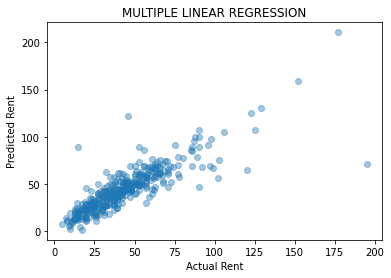

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
#MSE 값 구하기
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

180.09759560684378


In [ ]:
df.columns

Index(['PM2.5(bj)', 'PM10(bj)', 'PM2.5(gn)', 'PM10(gn)', 'PM2.5(tg)',
       'PM10(tg)', 'SO2 (ppm)', 'PM10 (ug/m3)', 'O3 (ppm)', 'NO2 (ppm)',
       'CO (ppm)', 'PM2.5 (ug/m3)', '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균'],
      dtype='object')

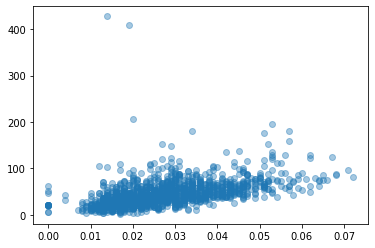

In [ ]:
plt.scatter(df[['NO2 (ppm)']], df[['PM10 (ug/m3)']], alpha=0.4)
plt.show()

---
> # LSTM 시계열 분석
> # [LSTM 다변량 시계열 분석1](https://qwerty1434.github.io/다중변수의-타임시리즈-LSTM연습)
> # [LSTM 다변량 시계열 분석](https://codetorial.net/tensorflow/time_series_forecasting/forecast_a_multivariate_time_series.html)

- set index to date 
- minmax/standard scaling 
- make validation dataset
- how to fill LSTM's parameters


In [ ]:
pd.read_excel('/content/drive/MyDrive/전체데이터.xlsx')

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.date.values

array(['2017-06-01T00:00:00.000000000', '2017-06-02T00:00:00.000000000',
       '2017-06-03T00:00:00.000000000', ...,
       '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
import date 

convert_date = datetime.datetime.strptime()

dtype('<M8[ns]')

In [ ]:
from datetime import datetime

In [ ]:
def parse(x):
  return datetime.strptime(x, '%Y-%m-%d').date()
#dataset = read_csv('raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']],
#                 index_col=0, date_parser=parse)

In [ ]:
df.date=df.date.astype('str')

In [ ]:
dt = []
for i in range(len(df)):
 # print(parse(df.date.values[i]))
  dt.append(parse(df.date.values[i]))


In [ ]:
dt=pd.Series(dt)

In [ ]:
df.date=dt

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
ltm=ltm[211:1307]

In [ ]:
ltm

In [ ]:
values=ltm.values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
      cols.append(df.shift(i))
      names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
          names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
      else:
          names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
      agg.dropna(inplace=True)
  return agg

In [ ]:
scaled

array([[0.20600858, 0.05705521, 0.17266187, ..., 0.        , 0.37142857,
        0.34637261],
       [0.27896996, 0.07055215, 0.08273381, ..., 0.        , 0.34285714,
        0.6803568 ],
       [0.15879828, 0.0196319 , 0.10791367, ..., 0.04822335, 0.37142857,
        0.56955225],
       ...,
       [0.13733906, 0.03251534, 0.15467626, ..., 0.        , 0.31428571,
        0.59238867],
       [0.11158798, 0.02453988, 0.07913669, ..., 0.        , 0.25714286,
        0.58598525],
       [0.06008584, 0.01656442, 0.08633094, ..., 0.04568528, 0.22857143,
        0.59170345]])

In [ ]:
reframed = series_to_supervised(scaled, 1, 1) # 1을 3으로 바꿈

In [ ]:
reframed

In [ ]:
reframed.shape

(1090, 192)

In [ ]:
1096/2

548.0

In [ ]:
values = reframed.values
n_train_hours = 365*2 #1년치 데이터만 가져온다
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]



In [ ]:
train.shape, test.shape

((730, 192), (360, 192))

In [ ]:
train

array([[0.14592275, 0.21575342, 0.45323741, ..., 0.        , 0.17142857,
        0.60781508],
       [0.12017167, 0.17123288, 0.52158273, ..., 0.        , 0.11428571,
        0.49439701],
       [0.0472103 , 0.09589041, 0.12589928, ..., 0.00761421, 0.28571429,
        0.58754972],
       ...,
       [0.04291845, 0.09589041, 0.14388489, ..., 0.        , 0.05714286,
        0.60882167],
       [0.06437768, 0.10958904, 0.18345324, ..., 0.        , 0.08571429,
        0.62940841],
       [0.16309013, 0.20205479, 0.22302158, ..., 0.        , 0.31428571,
        0.60012006]])

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [ ]:
train_X[0]

array([[0.20600858, 0.05705521, 0.17266187, 0.1425    , 0.12867647,
        0.07909605, 0.33333333, 0.06807512, 0.34482759, 0.27777778,
        0.38461538, 0.10833333, 0.74509804, 0.        , 0.37142857,
        0.34637261, 0.27896996, 0.07055215, 0.08273381, 0.07875   ,
        0.19117647, 0.10960452, 0.44444444, 0.07746479, 0.28448276,
        0.43055556, 0.53846154, 0.10833333, 0.77559913, 0.        ,
        0.34285714]])

In [ ]:
test_X.shape

(360, 1, 191)

In [486]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), input_dim=360))
model.add(Dense(512))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dropout(rate=0.2))
model.add(Dense(64))
model.add(Dense(32))

model.add(Dense(1, activation='tanh'))
model.compile(loss=['mse'], optimizer='adam', metrics=['accuracy'])

In [487]:
history = model.fit(train_X, train_y, epochs=250, batch_size=256, 
        validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/250
3/3 - 2s - loss: 0.2231 - accuracy: 0.0000e+00 - val_loss: 0.1361 - val_accuracy: 0.0028
Epoch 2/250
3/3 - 0s - loss: 0.0709 - accuracy: 0.0000e+00 - val_loss: 0.0562 - val_accuracy: 0.0028
Epoch 3/250
3/3 - 0s - loss: 0.0177 - accuracy: 0.0014 - val_loss: 0.0273 - val_accuracy: 0.0000e+00
Epoch 4/250
3/3 - 0s - loss: 0.0294 - accuracy: 0.0014 - val_loss: 0.0377 - val_accuracy: 0.0028
Epoch 5/250
3/3 - 0s - loss: 0.0195 - accuracy: 0.0000e+00 - val_loss: 0.0483 - val_accuracy: 0.0028
Epoch 6/250
3/3 - 0s - loss: 0.0120 - accuracy: 0.0000e+00 - val_loss: 0.0138 - val_accuracy: 0.0028
Epoch 7/250
3/3 - 0s - loss: 0.0095 - accuracy: 0.0014 - val_loss: 0.0121 - val_accuracy: 0.0028
Epoch 8/250
3/3 - 0s - loss: 0.0112 - accuracy: 0.0000e+00 - val_loss: 0.0176 - val_accuracy: 0.0028
Epoch 9/250
3/3 - 0s - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0304 - val_accuracy: 0.0028
Epoch 10/250
3/3 - 0s - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 0.0201 - val_accuracy: 0.00

In [484]:
loss, acc = model.evaluate(test_X, test_y, batch_size=256)


2/2 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 0.0028


In [479]:
loss, acc = model.evaluate(test_X, test_y, batch_size=2)
print('acc : ', acc)
print('loss : ', loss)
 
y_predict = model.predict(test_X)
print(y_predict)


180/180 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.0028
acc :  0.0027777778450399637
loss :  0.010989551432430744
[[0.36478508]
 [0.47383228]
 [0.46802956]
 [0.47181815]
 [0.51889443]
 [0.5371282 ]
 [0.4745704 ]
 [0.46863678]
 [0.5303096 ]
 [0.57098114]
 [0.5407985 ]
 [0.5389847 ]
 [0.53610414]
 [0.48451683]
 [0.4985078 ]
 [0.5378349 ]
 [0.52699465]
 [0.53803736]
 [0.4694474 ]
 [0.54067147]
 [0.5213162 ]
 [0.47200674]
 [0.5061421 ]
 [0.53724426]
 [0.55413646]
 [0.5227844 ]
 [0.5442725 ]
 [0.5285384 ]
 [0.4936946 ]
 [0.49601272]
 [0.5479431 ]
 [0.5397665 ]
 [0.5241954 ]
 [0.53316027]
 [0.45657998]
 [0.53182286]
 [0.507749  ]
 [0.54886967]
 [0.56450933]
 [0.5846739 ]
 [0.62936723]
 [0.5856581 ]
 [0.5559491 ]
 [0.5700786 ]
 [0.56606996]
 [0.5811831 ]
 [0.559915  ]
 [0.56159747]
 [0.5486321 ]
 [0.49549302]
 [0.46941268]
 [0.47256386]
 [0.47853324]
 [0.5086793 ]
 [0.5234137 ]
 [0.48000962]
 [0.48351964]
 [0.50589424]
 [0.49749967]
 [0.5084901 ]
 [0.52354217]

In [476]:
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE : ', RMSE(test_y, y_predict)) 


RMSE :  0.10483106236980091


In [477]:
r2_y_predict = r2_score(test_y, y_predict)
print('R2 : ', r2_y_predict)



R2 :  -0.04285496152049384


In [478]:
y_pred = model.predict(test_X)

In [ ]:
df

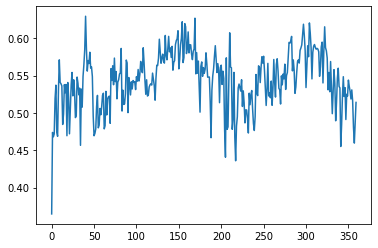

In [493]:
plt.plot(y_pred)

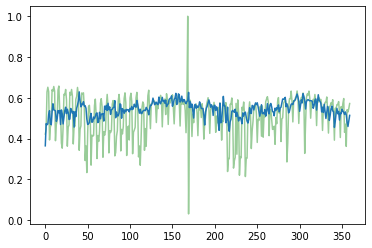

In [499]:
plt.plot(test_y, c='green', alpha=0.4)
plt.plot(y_pred)

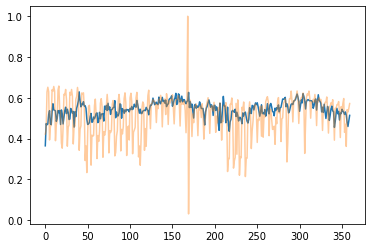

In [480]:
plt.plot(y_pred)
plt.plot(test_y, alpha=0.4)

In [460]:
print(r2_score(test_y, y_pred))

-0.1351764327270608


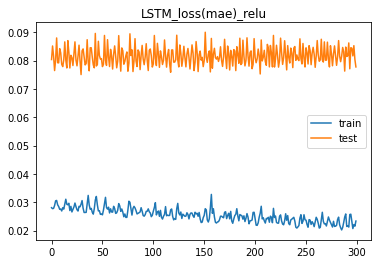

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('LSTM_loss(mae)_relu')
plt.show()

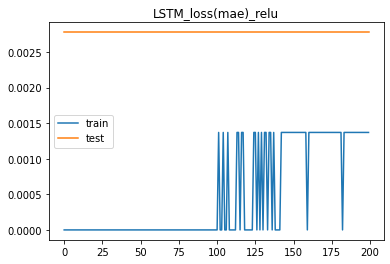

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title('LSTM_loss(mae)_relu')
plt.show()

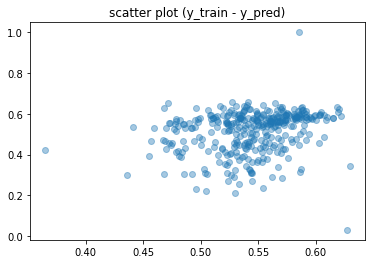

In [485]:
plt.scatter(y_predict, test_y, alpha=0.4)

plt.title('scatter plot (y_train - y_pred)')
plt.show()

In [483]:
print(np.mean(test_y==y_predict))

0.0


In [ ]:
print(r2_score(test_y, y_pred))

-0.3101245315651029


In [ ]:
test_X.shape, train_X.shape

((726, 95), (365, 1, 95))

---
 